In [5]:
import numpy as np
import matplotlib.pyplot as plt


num_steps = 100
process_noise_variance = 1e-5
measurement_noise_variance = 0.0001


true_voltage = 0.44
ground_truth = np.full(num_steps, true_voltage)

process_noise = np.random.normal(0, np.sqrt(process_noise_variance), num_steps)
measurement_noise = np.random.normal(0, np.sqrt(measurement_noise_variance), num_steps)
measurements = ground_truth + measurement_noise


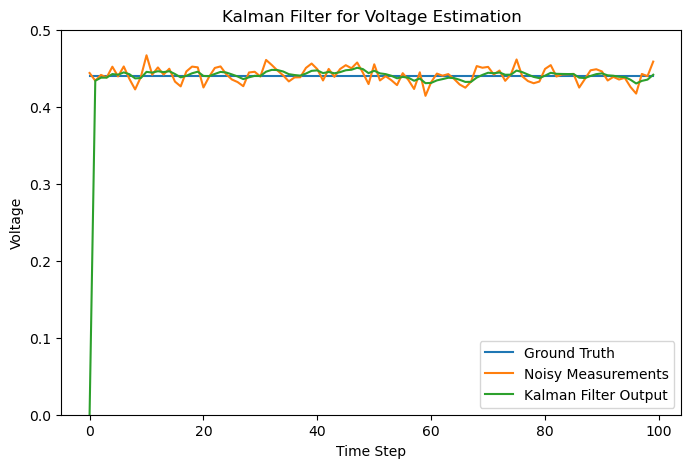

array([0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44])

In [7]:
# -*- coding: utf-8 -*-
"""Problem2.1.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1XVG28QY11wGiaz8bT_U-WDHEaBUfcaxL
"""

import numpy as np
import matplotlib.pyplot as plt


num_steps = 100
process_noise_variance = 1e-5
measurement_noise_variance = 0.0001


true_voltage = 0.44
ground_truth = np.full(num_steps, true_voltage)


process_noise = np.random.normal(0, np.sqrt(process_noise_variance), num_steps)


measurement_noise = np.random.normal(0, np.sqrt(measurement_noise_variance), num_steps)
measurements = ground_truth + measurement_noise


x_hat = np.zeros(num_steps)
P = np.ones(num_steps)


for k in range(1, num_steps):

    x_hat_minus = x_hat[k - 1]
    P_minus = P[k - 1] + process_noise_variance
    K = P_minus / (P_minus + measurement_noise_variance)
    x_hat[k] = x_hat_minus + K * (measurements[k] - x_hat_minus)
    P[k] = (1 - K) * P_minus

plt.figure(figsize=(8, 5))
# plt.plot(ground_truth, label='Ground Truth')
# plt.scatter(range(num_steps), measurements, label='Noisy Measurements', color='red', marker='x')
# plt.plot(x_hat, label='Kalman Filter Output', color='blue')

plt.plot(ground_truth, label='Ground Truth')
plt.plot(measurements, label='Noisy Measurements')
plt.plot(x_hat, label='Kalman Filter Output')
plt.xlabel('Time Step')
plt.ylabel('Voltage')
plt.ylim(0,0.5)
plt.legend()
plt.title('Kalman Filter for Voltage Estimation')
plt.show()

ground_truth



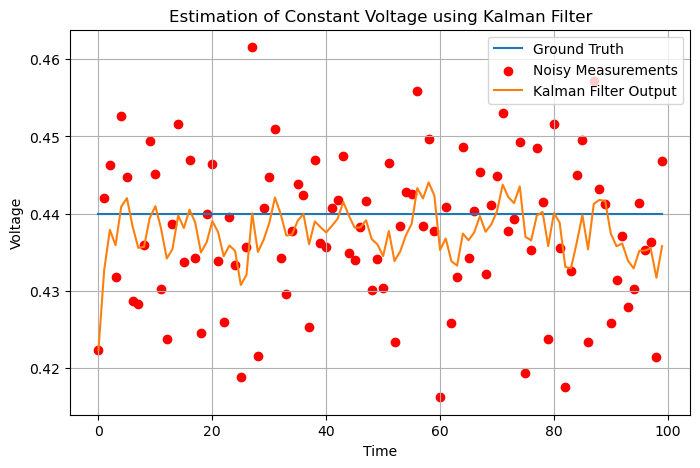

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
noise_var_process = 1e-5
noise_var_measurement = 0.0001
num_steps = 100

# True constant voltage
true_voltage = 0.44

# Initialize Kalman filter variables
x_k_minus_1 = 0  # Initial state estimation
P_k_minus_1 = 1  # Initial error covariance estimation

# Arrays to store values for plotting
ground_truth = np.full(num_steps, true_voltage)
noisy_measurements = np.random.normal(true_voltage, np.sqrt(noise_var_measurement), num_steps)
kalman_output = []

# Kalman Filter loop
for z_k in noisy_measurements:
    # Prediction step
    x_k = x_k_minus_1
    P_k = P_k_minus_1 + noise_var_process
    
    # Update step
    K_k = P_k / (P_k + noise_var_measurement)
    x_k = x_k + K_k * (z_k - x_k)
    P_k = (1 - K_k) * P_k
    
    # Store filtered output
    kalman_output.append(x_k)
    
    # Update variables for next iteration
    x_k_minus_1 = x_k
    P_k_minus_1 = P_k

lol=noisy_measurements.reshape(50,2)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(ground_truth, label='Ground Truth')
plt.scatter(np.arange(num_steps), noisy_measurements, label='Noisy Measurements', color='red')  # Scatter plot
#plt.plot(noisy_measurements, label='Noisy Measurements')
plt.plot(kalman_output, label='Kalman Filter Output')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Estimation of Constant Voltage using Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()
